In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Task 1 Understanding Dataset

In [46]:
dataset =pd.read_csv("used_cars.csv")
dataset.head(3)


,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"


In [48]:
dataset.shape

(4009, 12)

In [50]:
dataset.dtypes

brand           object
model           object
model_year       int64
milage          object
fuel_type       object
engine          object
transmission    object
ext_col         object
int_col         object
accident        object
clean_title     object
price           object
dtype: object

In [52]:
dataset.isnull().sum()

brand             0
model             0
model_year        0
milage            0
fuel_type       170
engine            0
transmission      0
ext_col           0
int_col           0
accident        113
clean_title     596
price             0
dtype: int64

In [54]:
dataset.shape

(4009, 12)

##  Task 2 Data Cleaning

In [27]:
dataset=dataset.dropna( subset= ["price","milage","model_year"])

In [31]:
dataset["price"] =pd.to_numeric(dataset["price"],errors="coerce")
dataset["milage"] =pd.to_numeric(dataset["milage"],errors="coerce")
dataset["model_year"] =pd.to_numeric(dataset["model_year"],errors="coerce")

In [33]:
dataset.dtypes

brand            object
model            object
model_year        int64
milage          float64
fuel_type        object
engine           object
transmission     object
ext_col          object
int_col          object
accident         object
clean_title      object
price           float64
dtype: object

In [35]:
dataset.drop_duplicates(inplace=True)

In [56]:
dataset.shape

(4009, 12)

## Task 3 Most Common Cars Brand

In [80]:
top_brands = dataset["brand"].value_counts().head(10)
top_brands 

brand
Ford             386
BMW              375
Mercedes-Benz    315
Chevrolet        292
Porsche          201
Audi             200
Toyota           199
Lexus            163
Jeep             143
Land             130
Name: count, dtype: int64

In [96]:
top_brands = dataset['brand'].value_counts().head(10)
top_brands

brand
Ford             386
BMW              375
Mercedes-Benz    315
Chevrolet        292
Porsche          201
Audi             200
Toyota           199
Lexus            163
Jeep             143
Land             130
Name: count, dtype: int64

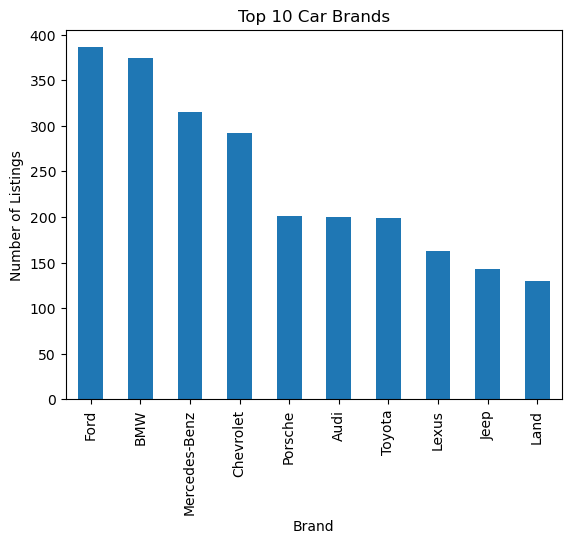

In [92]:
top_brands.plot(kind='bar', title='Top 10 Car Brands')
plt.xlabel('Brand')
plt.ylabel('Number of Listings')

plt.show()

##   Task 4 Car Price Destribution

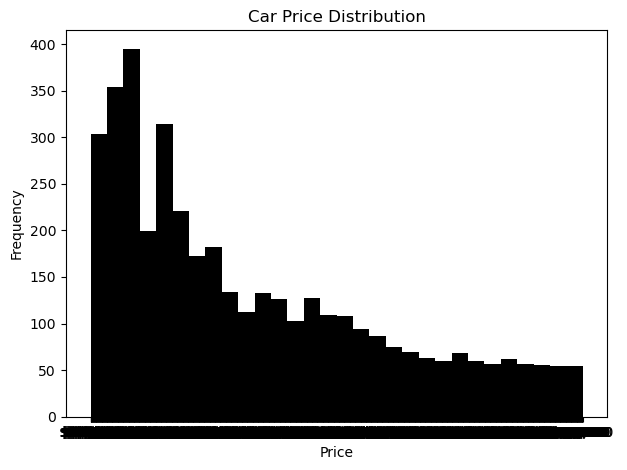

In [105]:
plt.hist(dataset["price"],bins =30 ,color ="black")
plt.title("Car Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [112]:
dataset["price"] =pd.to_numeric(dataset["price"],errors="coerce")

In [124]:
dataset["price"]=print(dataset["price"].mean())
dataset["price"]=print(dataset["price"].mode())
dataset["price"]=print(dataset["price"].std())
dataset["price"]=print(dataset["price"].median())

nan
Series([], Name: price, dtype: object)
nan
nan


C:\Users\PC\anaconda3\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [152]:
dataset["price"] = dataset["price"].fillna(dataset["price"].mean())


## Task 5 Newer Always Expensive

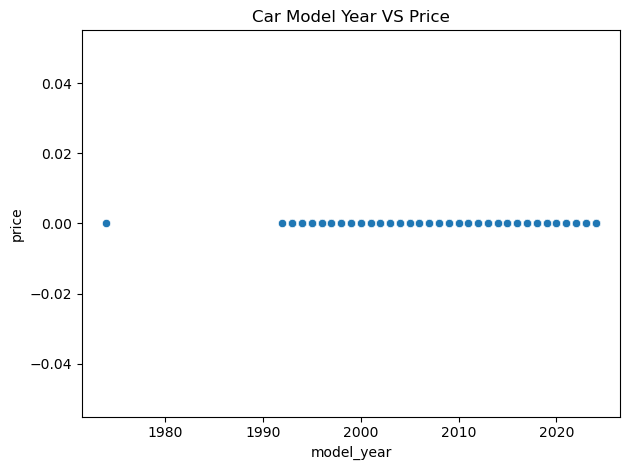

In [159]:
sns.scatterplot(x="model_year",y="price",data=dataset)
plt.title("Car Model Year VS Price")
plt.xlabel("model_year")
plt.ylabel("price")
plt.tight_layout()
plt.show()

## Task 6 Compare Brand Prices

In [171]:
top5_brands =dataset["brand"].value_counts().head().index
top5_brands

Index(['Ford', 'BMW', 'Mercedes-Benz', 'Chevrolet', 'Porsche'], dtype='object', name='brand')

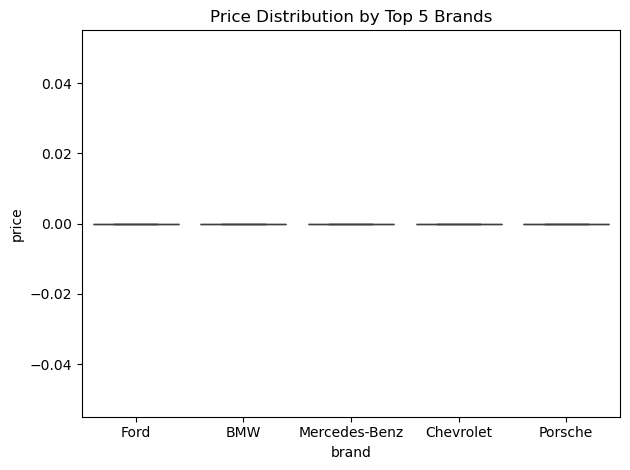

In [201]:
sns.boxplot(x ="brand",y ="price",data =dataset[dataset["brand"].isin(top5_brands)])
plt.title("Price Distribution by Top 5 Brands")
plt.tight_layout()
plt.show()

## Task 7: Feature Correlation

In [210]:
dataset["milage"]=pd.to_numeric(dataset["milage"],errors="coerce")

In [214]:
correlation = dataset[['price','milage','model_year']].corr()
correlation

,price,milage,model_year
price,NaN,NaN,NaN
milage,NaN,NaN,NaN
model_year,NaN,NaN,1.0


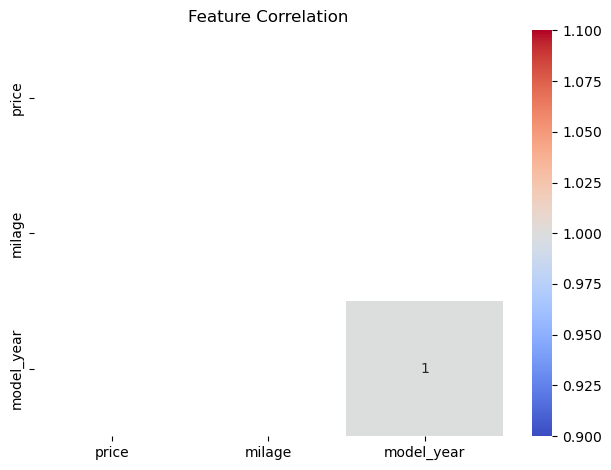

In [216]:
sns.heatmap(correlation,annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.tight_layout()
plt.show()

## Task 8: Analyze by Category

In [229]:
grouped =  dataset.groupby('fuel_type')[['transmission']].value_counts()
pd.DataFrame(grouped)

count
fuel_type transmission                         
Diesel    6-Speed A/T                        33
          A/T                                28
          10-Speed A/T                       12
          5-Speed A/T                         9
          Automatic                           7
...                                         ...
–         9-Speed A/T                         2
          Transmission w/Dual Shift Mode      2
          –                                   2
          5-Speed A/T                         1
          8-Speed A/T                         1

[115 rows x 1 columns]

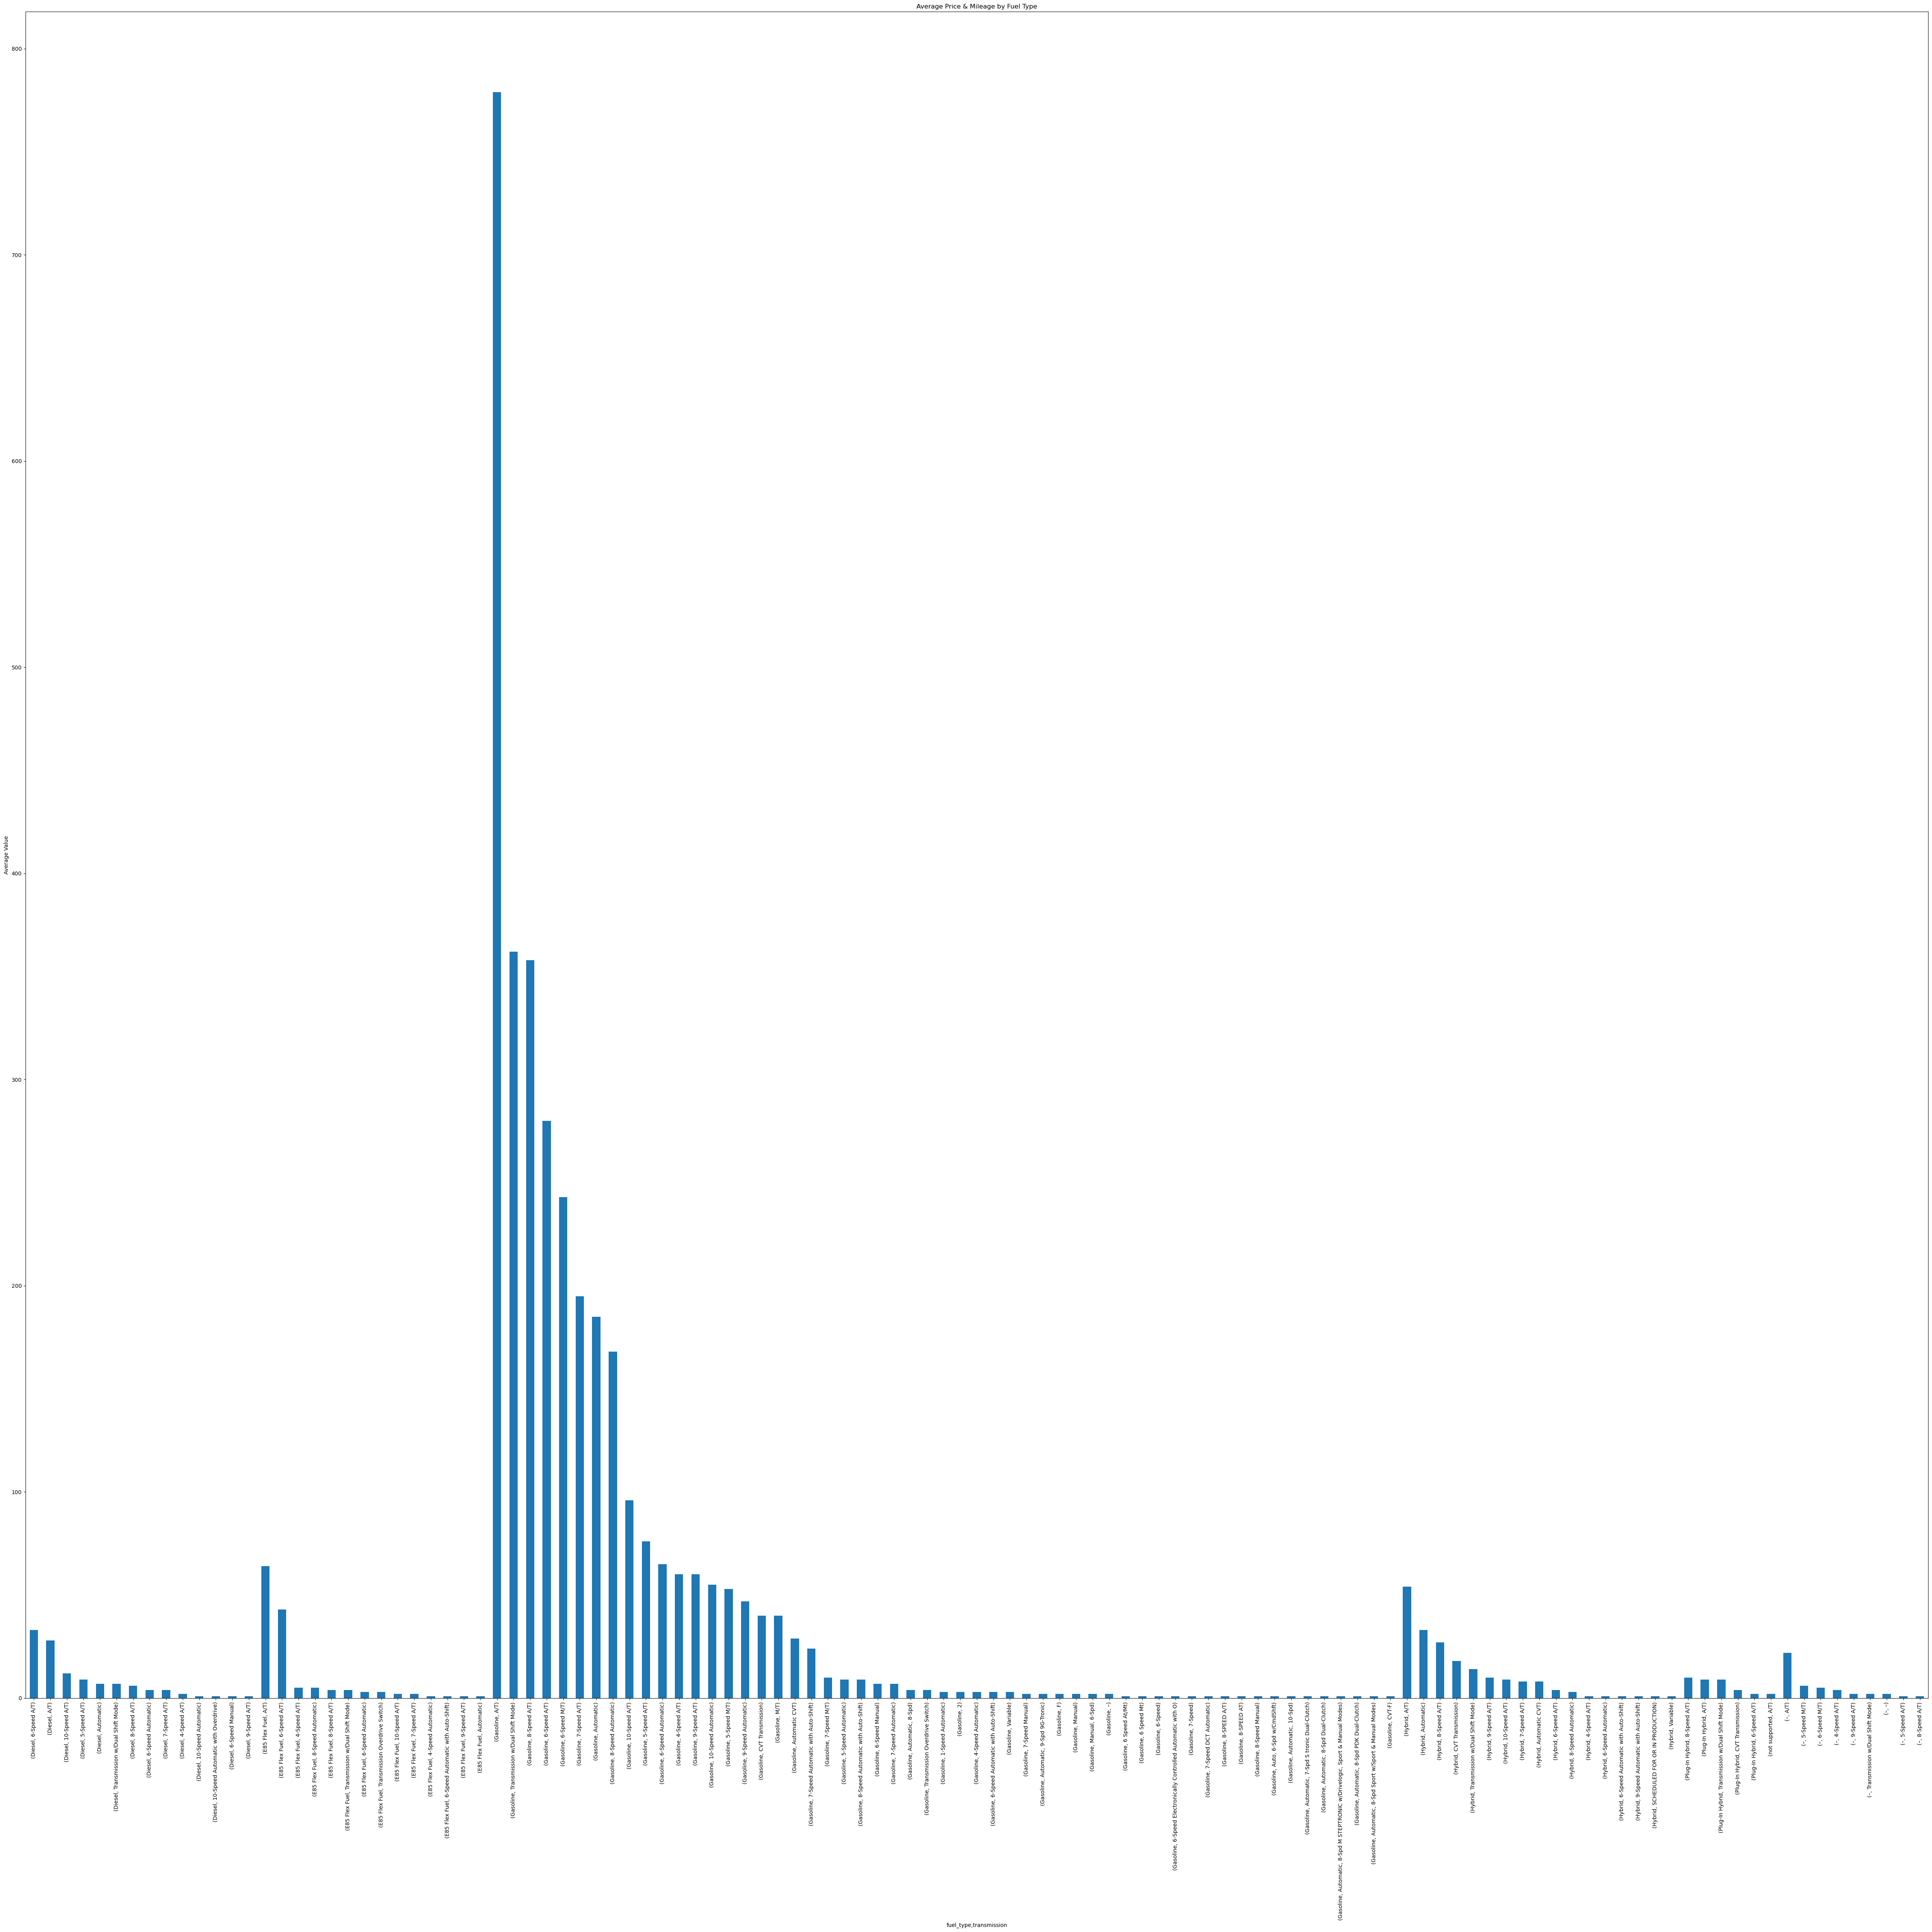

In [235]:
plt.figure(figsize=(50,50))
grouped.plot(kind='bar')
plt.title("Average Price & Mileage by Fuel Type")
plt.ylabel("Average Value")
plt.tight_layout()
plt.show()

## Task 9: Custom Search Function

In [253]:
    def find_matching_cars(dataset, brand, max_milage, max_price):
     dataset['price'] = pd.to_numeric(dataset['price'], errors='coerce')
     dataset['milage'] = pd.to_numeric(dataset['milage'], errors='coerce')
     dataset.dropna(subset=['price', 'milage', 'brand'], inplace=True)
     return dataset[
        (dataset['brand'].str.lower() == brand.lower()) &
        (dataset['milage'] <= max_milage) &
        (dataset['price'] <= max_price)
    ]
 
matches = find_matching_cars(dataset, 'Ford', 51000, 10300)
print("Matching Cars:\n", matches)

Matching Cars:
 Empty DataFrame
Columns: [brand, model, model_year, milage, fuel_type, engine, transmission, ext_col, int_col, accident, clean_title, price]
Index: []


## Task 10 (Optional Challenge): Interactive Plot
 

In [260]:
dataset1 = pd.read_csv("used_cars.csv")
dataset1.head(2)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"


In [278]:
df['price'] = pd.to_numeric(dataset1['price'], errors='coerce')
df['milage'] = pd.to_numeric(dataset1['milage'], errors='coerce')
df['model_year'] = pd.to_numeric(dataset1['model_year'], errors='coerce')

In [280]:
dataset1.dropna(subset=['price', 'milage', 'brand', 'model_year'], inplace=True)

In [288]:
top_brands = dataset1['brand'].value_counts().head(5).index.tolist()
top_years = dataset1['model_year'].value_counts().sort_index(ascending=False).head(5).index.astype(int).tolist()


In [290]:
current_brand = top_brands[0]    
current_year = top_years[0]
filtered_df = dataset1[(dataset1['brand'] == current_brand) & (dataset1['model_year'] == current_year)]


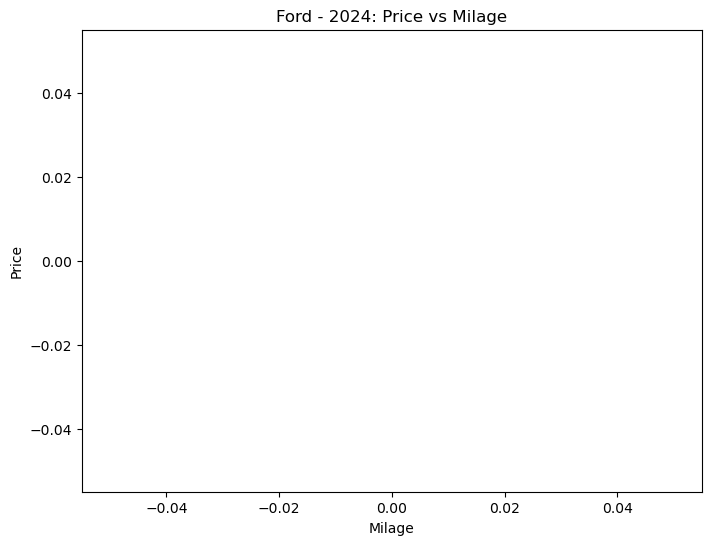

In [305]:
fig, ax = plt.subplots(figsize=(8, 6))

 
scatter = ax.scatter(filtered_df['milage'], filtered_df['price'], alpha=0.7)
 
ax.set_title(f"{current_brand} - {current_year}: Price vs Milage")
ax.set_xlabel("Milage")
ax.set_ylabel("Price")

plt.show()

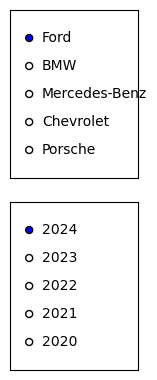

In [297]:

brand_ax = plt.axes([0.05, 0.5, 0.2, 0.35])
brand_radio = RadioButtons(brand_ax, top_brands)

 
year_ax = plt.axes([0.05, 0.1, 0.2, 0.35])
year_radio = RadioButtons(year_ax, [str(y) for y in top_years])

# Update plot when brand or year changes
def update_plot(val):
    brand = brand_radio.value_selected
    year = int(year_radio.value_selected)
    new_data = df[(df['brand'] == brand) & (df['model_year'] == year)]

    scatter.set_offsets(np.column_stack((new_data['milage'], new_data['price'])))
    ax.set_title(f"{brand} - {year}: Price vs Mileage")
    fig.canvas.draw_idle()

# Connect both radio buttons
brand_radio.on_clicked(update_plot)
year_radio.on_clicked(update_plot)

plt.show()
